**CAPSTONE PROJECT**

Intensity Analysis (Build your own model using NLP and Python)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import nltk
import re
import string
from textblob import Word
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from collections import Counter

In [2]:
# Download 'wordnet' dataset
nltk.download('wordnet')
# Download the required NLTK data package before using pos_tag
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [3]:
# Function to preprocess text
# data cleaning
def word_prob(word): return dictionary[word] / total
def words(text): return re.findall('[a-z]+', text.lower())
dictionary = Counter(words(open(r'/content/drive/MyDrive/merged.txt').read()))
max_word_length = max(map(len, dictionary))
total = float(sum(dictionary.values()))

def viterbi_segment(text):
    probs, lasts = [1.0], [0]
    for i in range(1, len(text) + 1):
        prob_k, k = max((probs[j] * word_prob(text[j:i]), j)
                        for j in range(max(0, i - max_word_length), i))
        probs.append(prob_k)
        lasts.append(k)
    words = []
    i = len(text)
    while 0 < i:
        words.append(text[lasts[i]:i])
        i = lasts[i]
    words.reverse()
    return words, probs[-1]

def fix_hashtag(text):
    text = text.group().split(":")[0]
    text = text[1:] # remove '#'
    try:
        test = int(text[0])
        text = text[1:]
    except:
        pass
    output = ' '.join(viterbi_segment(text)[0])
    return output

def preprocess_text(text):
    """pattern = re.compile(r"(.)\1{2,}")
    text = pattern.sub(r"\1\1", str(text))
    text = re.sub(r'http.?://[^\s]+[\s]?', '', str(text))
    punct = string.punctuation
    trantab = str.maketrans(punct, len(punct) * ' ')  # Every punctuation symbol will be replaced by a space
    text = text.translate(trantab)
    text = text.lower()
    text = text.strip()"""
    text = re.sub(r'([^\s\w]|\d|_)+', '', text)
    text = text.lower()
    text = re.sub("(#[A-Za-z0-9]+)", fix_hashtag, text)
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())

    text = re.sub('\d+', '', str(text))
    def get_wordnet_pos(word):
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)

    ps = PorterStemmer()
    words = text.split()
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words]
    text = " ".join(lemma_words)

    nltk.download('stopwords')
    stopwords_list = stopwords.words('english')
    # Some words which might indicate a certain sentiment are kept via a whitelist
    whitelist = ["n't", "not", "no"]
    words = text.split()
    clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1]
    text = " ".join(clean_words)

    text = text.strip()
    return text

In [4]:
# Load training data from Excel files
happiness_data = pd.read_csv(r"/content/drive/MyDrive/happiness.csv")
angriness_data = pd.read_csv(r"/content/drive/MyDrive/angriness.csv")
sadness_data = pd.read_csv(r"/content/drive/MyDrive/sadness.csv")

# Combine all data and create labels
all_data = pd.concat([happiness_data, angriness_data, sadness_data], ignore_index=True)
all_data["processed_text"] = all_data["content"].apply(preprocess_text)

print(all_data.info())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2039 entries, 0 to 2038
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   content         2039 non-null   object
 1   intensity       2039 non-null   object
 2   processed_text  2039 non-null   object
dtypes: object(3)
memory usage: 47.9+ KB
None


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /ro

In [5]:
emotion_label_map = {
    'sadness': 2,
    'happiness': 1,
    'angriness': 3
}

# Define a function to map the values
def set_emotionvalue(row_number, assigned_value):
    return assigned_value[row_number]

df_copy = all_data[['processed_text']].copy()
df_copy['emotion_label'] = all_data['intensity'].apply(set_emotionvalue, args=(emotion_label_map, ))

#print(df_copy[:10])
# saving the dataframe
df_copy.to_csv(r'/content/cleaned_data.csv')

<ipython-input-7-a8c49d5d341c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, alpha=0.8, palette="Blues")


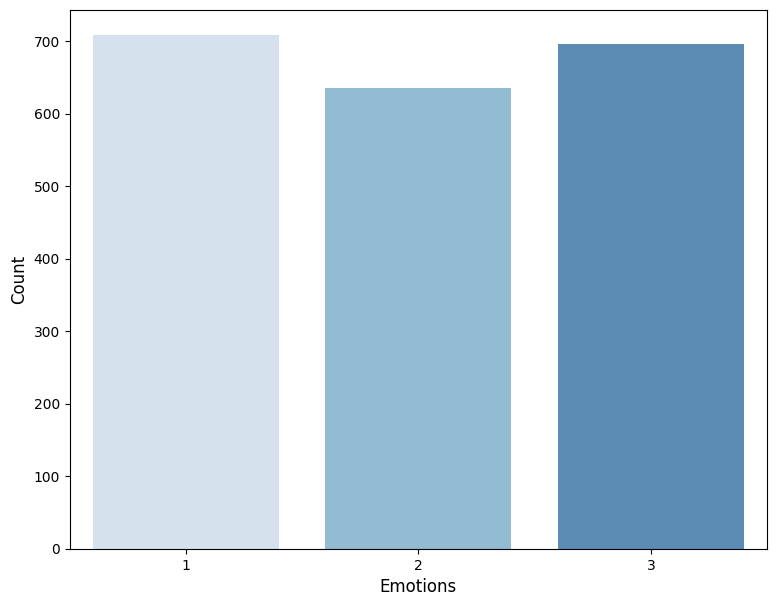

In [7]:
count  = df_copy.iloc[:,1].value_counts()
plt.figure(figsize=(9,7))
sns.barplot(x=count.index, y=count.values, alpha=0.8, palette="Blues")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Emotions', fontsize=12)
plt.show()

In [8]:
X_train = df_copy.iloc[:,0][:1979]
y_train = df_copy.iloc[:,-1][:1979]
X_val = df_copy.iloc[:,0][1001:]
y_val = df_copy.iloc[:,-1][1001:]

In [9]:
tfidf = TfidfVectorizer(max_features=1000, analyzer='word',ngram_range=(1,3))
X_train_tfidf = tfidf.fit_transform(X_train.astype('U'))
X_val_tfidf = tfidf.fit_transform(X_val.astype('U'))
print(tfidf.vocabulary_)

{'make': 422, 'well': 947, 'may': 432, 'win': 960, 'lose': 409, 'never': 503, 'think': 882, 'bad': 36, 'youre': 990, 'wrong': 971, 'im': 343, 'youre wrong': 998, 'know': 372, 'dont': 156, 'care': 69, 'dont care': 157, 'need': 494, 'explain': 246, 'right': 737, 'people': 661, 'word': 967, 'feel': 264, 'last': 377, 'see': 758, 'best': 48, 'way': 941, 'live': 402, 'year': 976, 'met': 446, 'wish': 961, 'heart': 319, 'not': 540, 'change': 76, 'try': 918, 'im not': 350, 'fake': 257, 'people dont': 668, 'people dont care': 669, 'talk': 854, 'sometimes': 808, 'sometimes need': 814, 'life': 391, 'give': 296, 'want': 933, 'read': 715, 'status': 830, 'quote': 710, 'whatsapp': 951, 'get': 289, 'mouth': 470, 'thing': 874, 'go': 298, 'shit': 768, 'happens': 308, 'people change': 664, 'end': 214, 'wont': 965, 'know wont': 374, 'stop': 844, 'believe': 47, 'take': 853, 'lot': 414, 'use': 926, 'look': 405, 'ive': 363, 'kill': 367, 'time': 893, 'remember': 732, 'perfect': 680, 'rest': 735, 'rest life': 7

<ipython-input-10-48255ba586db>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="word", y="freq", data= word_counter_df, ax=ax, palette="Blues")


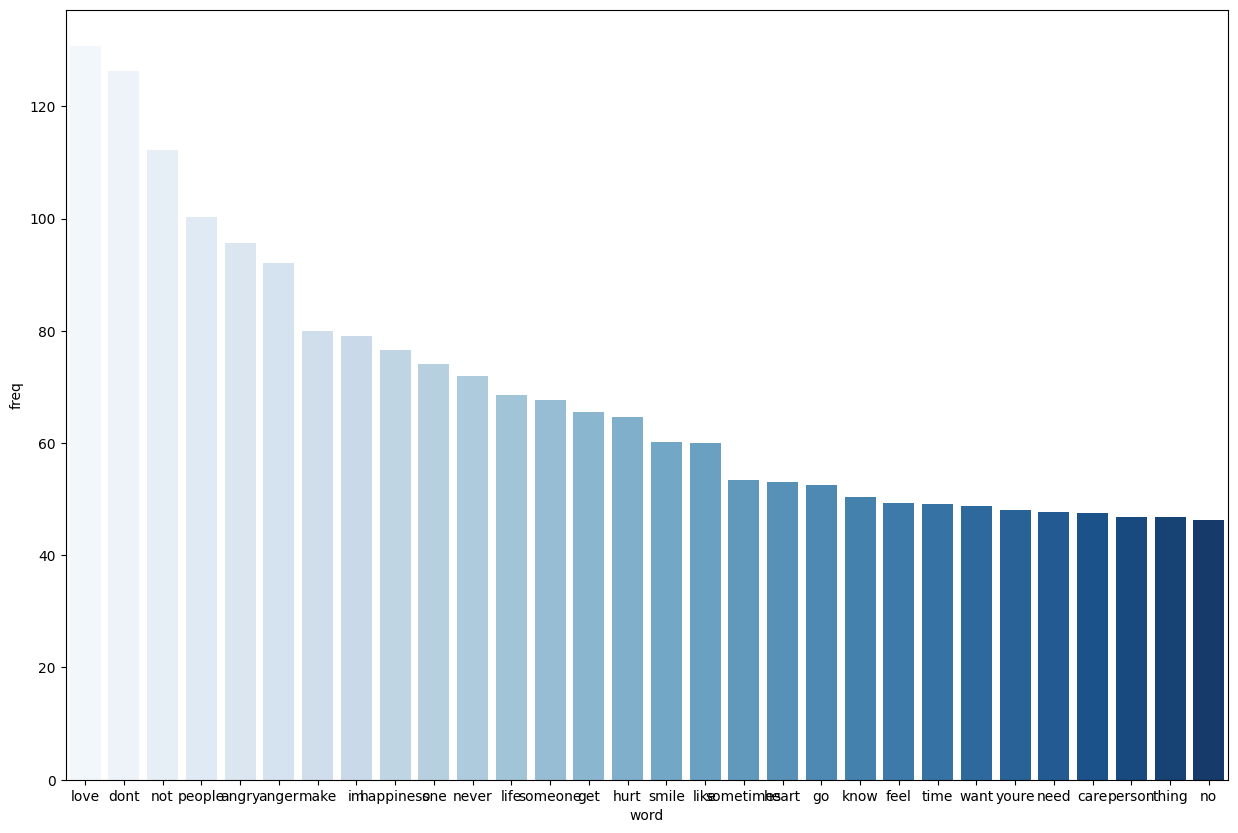

In [10]:
bow = tfidf.fit_transform(df_copy.iloc[:,0].astype('U'))
word_freq = dict(zip(tfidf.get_feature_names_out(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(30), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x="word", y="freq", data= word_counter_df, ax=ax, palette="Blues")
plt.show();


In [11]:
# Extracting Count Vectors Parameters
count_vect = CountVectorizer(analyzer='word')
count_vect.fit(df_copy.iloc[:,0].astype('U'))
X_train_count =  count_vect.transform(X_train.astype('U'))
X_val_count =  count_vect.transform(X_val.astype('U'))
print(count_vect.vocabulary_)

{'want': 1893, 'know': 993, 'hell': 854, 'remember': 1454, 'word': 1952, 'song': 1632, 'year': 1973, 'ago': 31, 'cant': 261, 'go': 776, 'next': 1194, 'room': 1492, 'love': 1061, 'long': 1051, 'sweet': 1723, 'dream': 517, 'marriage': 1090, 'alarm': 38, 'clock': 318, 'world': 1954, 'could': 382, 'amaze': 54, 'slightly': 1611, 'strange': 1681, 'secret': 1532, 'talent': 1732, 'get': 767, 'tire': 1790, 'without': 1945, 'anything': 80, 'khatarnaak': 984, 'whatsapp': 1917, 'status': 1667, 'ever': 598, 'talk': 1733, 'wife': 1928, 'around': 96, 'new': 1193, 'way': 1903, 'forget': 718, 'past': 1271, 'delete': 453, 'chat': 291, 'country': 387, 'island': 960, 'sea': 1527, 'billion': 179, 'people': 1286, 'im': 907, 'still': 1671, 'single': 1598, 'available': 116, 'prabhu': 1348, 'ichhaa': 898, 'tak': 1729, 'life': 1029, 'short': 1571, 'serious': 1552, 'time': 1786, 'laugh': 1007, 'call': 253, 'really': 1430, 'cool': 375, 'feature': 673, 'nano': 1172, 'dont': 510, 'tell': 1744, 'even': 596, 'beggar'

(2039, 1993)


<ipython-input-12-a66264d9b846>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="word", y="freq", data= word_counter_df, ax=ax, palette="Blues")


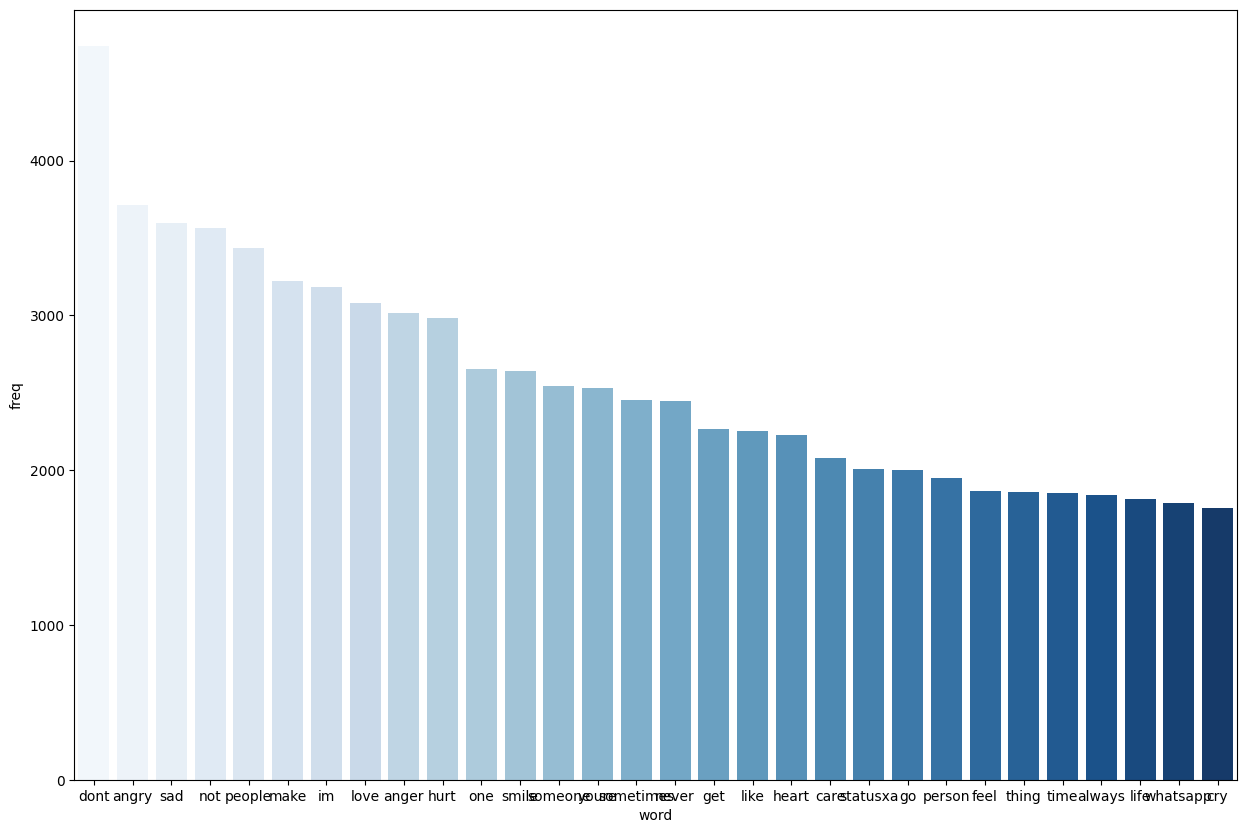

In [12]:
bow = count_vect.fit_transform(df_copy.iloc[:,0].astype('U'))
print(bow.shape)
word_freq = dict(zip(count_vect.get_feature_names_out(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(30), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x="word", y="freq", data= word_counter_df, ax=ax, palette="Blues")
plt.show();

In [13]:
#Model 1: Multinomial Naive Bayes Classifier

nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred = nb.predict(X_val_tfidf)
print('naive bayes tfidf accuracy %s' % accuracy_score(y_pred, y_val))
# naive bayes tfidf accuracy 0.24907063197026022

naive bayes tfidf accuracy 0.43834296724470134


In [14]:
#Model 2: Linear SVM
lsvm = SGDClassifier(alpha=0.001, random_state=5, max_iter=15, tol=None)
lsvm.fit(X_train_tfidf, y_train)
y_pred = lsvm.predict(X_val_tfidf)
print('svm using tfidf accuracy %s' % accuracy_score(y_pred, y_val))
# svm using tfidf accuracy 0.0018587360594795538

svm using tfidf accuracy 0.28227360308285165


In [15]:
#Model 3: logistic regression
logreg = LogisticRegression(C=1, max_iter=100)
logreg.fit(X_train_tfidf, y_train)
y_pred = logreg.predict(X_val_tfidf)
print('log reg tfidf accuracy %s' % accuracy_score(y_pred, y_val))
# log reg tfidf accuracy 0.0

log reg tfidf accuracy 0.2524084778420039


In [16]:
# Model 1: Multinomial Naive Bayes Classifier

nb1 = MultinomialNB()
nb1.fit(X_train_count, y_train)
y_pred = nb1.predict(X_val_count)
print('naive bayes count vectors accuracy %s' % accuracy_score(y_pred, y_val))
# naive bayes count vectors accuracy 0.8736059479553904

naive bayes count vectors accuracy 0.6223506743737958


In [17]:
# Model 2: Logistic Regression
logreg1 = LogisticRegression(C=1, max_iter=500)
logreg1.fit(X_train_count, y_train)
y_pred = logreg1.predict(X_val_count)
print('log reg count vectors accuracy %s' % accuracy_score(y_pred, y_val))
# log reg count vectors accuracy 0.9237918215613383

log reg count vectors accuracy 0.9296724470134875


In [18]:
# Model 3: Linear SVM
lsvm1 = SGDClassifier(alpha=0.001, random_state=5, max_iter=2, tol=None)
lsvm1.fit(X_train_count, y_train)
y_pred = lsvm1.predict(X_val_count)
print('lsvm using count vectors accuracy %s' % accuracy_score(y_pred, y_val))
# lsvm using count vectors accuracy 0.8866171003717472

lsvm using count vectors accuracy 0.8622350674373795


In [19]:
input_text = pd.DataFrame(["I am so angry at you!!!!!",
        "you ve hit a new low with a danger of blm fascist slogan please stop it before too late stop",
        "I love my doggg",
        "I think i'm gonna be sick :'‑(",
        "I hate you so much",
        "I'm at work",
        "@TheTombert i was watching Harpers Island, lol... there was no vodka involved",
        "sometimes i wish things could go back to the way they were the beginning of last summer",
        "it's your 18th birthday finally!!! yippeeeee",
        "still waiting in line",
        "aarrgghh - fu*k.....a hose has leaked water all over the new floating floor",
        "that b*tch is so ugly",
        "oh no he is hospitalised!!!",
       ])
text_count = count_vect.transform(input_text[0])

In [20]:
#Predicting the emotion of the text
text_pred = logreg1.predict(text_count)
print(text_pred)
input_text[0]

[3 3 1 1 1 1 1 2 1 1 1 1 3]


,0
0,I am so angry at you!!!!!
1,you ve hit a new low with a danger of blm fasc...
2,I love my doggg
3,I think i'm gonna be sick :'‑(
4,I hate you so much
5,I'm at work
6,"@TheTombert i was watching Harpers Island, lol..."
7,sometimes i wish things could go back to the w...
8,it's your 18th birthday finally!!! yippeeeee
9,still waiting in line


In [21]:
final_result=input_text.copy()

In [22]:
final_result['result']=text_pred
final_result=final_result.rename(columns={0:"input_text"})
final_result=final_result.rename(columns={"result":"predicted_emotion"})
final_result=final_result.replace({1: 'Happy', 2: 'Sad', 3: 'Anger'})
final_result

,input_text,predicted_emotion
0,I am so angry at you!!!!!,Anger
1,you ve hit a new low with a danger of blm fasc...,Anger
2,I love my doggg,Happy
3,I think i'm gonna be sick :'‑(,Happy
4,I hate you so much,Happy
5,I'm at work,Happy
6,"@TheTombert i was watching Harpers Island, lol...",Happy
7,sometimes i wish things could go back to the w...,Sad
8,it's your 18th birthday finally!!! yippeeeee,Happy
9,still waiting in line,Happy


In [23]:
final_result.to_csv(r'\Dataset\output_result.csv')